In [1]:
import pandas as pd
import numpy as np
import dtale
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Issues with training and validation sets

I'm now learning about validation sets, and realising that what I've done in this notebook uses the test set for model comparison. I need to start again ... although there's plenty of useful stuff in here.

In [3]:
dataset = pd.read_csv('./cleaned_dataset.csv')
X = dataset.drop(columns=['outcome','link'])
y = dataset.outcome
X.columns.to_list()

['season',
 'capacity',
 'elo_home',
 'elo_away',
 'home_newly_promoted',
 'home_newly_relegated',
 'away_newly_promoted',
 'away_newly_relegated',
 'home_goals_f_cum',
 'home_goals_a_cum',
 'away_goals_a_cum',
 'away_goals_f_cum',
 'home_streak',
 'away_streak']

In [7]:
X = X.drop(columns=['season','capacity','home_newly_promoted','home_newly_relegated','away_newly_promoted','away_newly_relegated'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
models = {
    'Multi-layer perceptron': [MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),learning_rate='adaptive')],
    'Random Forest': [RandomForestClassifier(max_depth=14, n_estimators=15)],
    'Bagging': [BaggingClassifier(n_estimators=5, max_samples=2000)],
    'Ada boost': [AdaBoostClassifier()],
    # 'Stacking': [StackingClassifier()],
    'Extra trees': [ExtraTreesClassifier(n_estimators=150, max_depth=15)],
    'K neighbours': [KNeighborsClassifier(n_neighbors=100, weights='uniform')]
}

for model in models:
    print(f"{model}:")
    test_model = models[model][0]
    test_model.fit(X_train, y_train)
    acc = accuracy_score(y_test, test_model.predict(X_test))
    train_acc = accuracy_score(y_train, test_model.predict(X_train))
    print(f"test: {acc}, train: {train_acc}")
    models[model].extend([acc, train_acc])

Multi-layer perceptron:
test: 0.7036457824259603, train: 0.7078141035038851
Random Forest:
test: 0.6929918874010361, train: 0.7116869471729463
Bagging:
test: 0.6557521258918971, train: 0.6684992425353077
Ada boost:
test: 0.6870296158733261, train: 0.6936666177979768
Extra trees:
test: 0.6736389404750269, train: 0.6807408493378293
K neighbours:
test: 0.5753103313459095, train: 0.5885011972829008


In [54]:
et = KNeighborsClassifier(n_neighbors=100, weights='uniform')
et.fit(X_train, y_train)
acc = accuracy_score(y_test, et.predict(X_test))
train_acc = accuracy_score(y_train, et.predict(X_train))
print(f"test: {acc}, train: {train_acc}")

test: 0.5753103313459095, train: 0.5885011972829008


In [40]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [31]:
np.random.seed(2)
# random forest GridSearch
gs = GridSearchCV(models['Random Forest'][0],
                  {'n_estimators':[14,15,16], 'max_depth':[16,18,20,25]},
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................max_depth=16, n_estimators=14; total time=   0.5s
[CV] END ......................max_depth=16, n_estimators=14; total time=   0.5s
[CV] END ......................max_depth=16, n_estimators=14; total time=   0.5s
[CV] END ......................max_depth=16, n_estimators=14; total time=   0.5s
[CV] END ......................max_depth=16, n_estimators=14; total time=   0.5s
[CV] END ......................max_depth=16, n_estimators=15; total time=   0.6s
[CV] END ......................max_depth=16, n_estimators=15; total time=   0.6s
[CV] END ......................max_depth=16, n_estimators=15; total time=   0.6s
[CV] END ......................max_depth=16, n_estimators=15; total time=   0.6s
[CV] END ......................max_depth=16, n_estimators=15; total time=   0.6s
[CV] END ......................max_depth=16, n_estimators=16; total time=   0.6s
[CV] END ......................max_depth=16, n_e

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [16, 18, 20, 25],
                         'n_estimators': [14, 15, 16]},
             scoring='accuracy', verbose=2)

In [32]:
print(gs.best_score_)
# 0.6946928391149525
print(gs.best_estimator_)
# RandomForestClassifier(max_depth=16, n_estimators=15)
# but this overfits somewhat so we drop the max_depth down slightly

0.6946928391149525
RandomForestClassifier(max_depth=16, n_estimators=15)


In [48]:
# MLP gridsearch
gs = GridSearchCV(models['Multi-layer perceptron'][0],
                  {'activation':['logistic','tanh','relu'], 'hidden_layer_sizes':[(100,),(50,50)], 'learning_rate':['constant','adaptive']},
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant; total time=  41.4s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant; total time=  38.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant; total time=  33.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant; total time=  58.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant; total time=  40.7s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  41.6s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  38.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  36.8s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  41.4s
[CV] END activation=logistic, hidden_la

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive']},
             scoring='accuracy', verbose=2)

In [49]:
print(gs.best_score_)
print(gs.best_estimator_)

# 0.7044543461856337
# MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),
            #   learning_rate='adaptive')

0.7044543461856337
MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),
              learning_rate='adaptive')


# Original model tests follow below

In [9]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=500).fit(X_train, y_train)

In [10]:
mlpc.score(X_test, y_test)

0.7000439818208474

In [11]:
mlpc.score(X_train, y_train)

0.7061647852221082

In [12]:
y_pred = mlpc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 207,  835,  794,   97],
       [  11, 2332, 1316,  176],
       [  26, 1523, 7790,   75],
       [  10,  946,  329, 3996]])

In [13]:
mlpc.predict_proba(X_test[:5]), y_test[:5]

(array([[1.02588921e-01, 2.94758105e-01, 5.40734721e-01, 6.19182527e-02],
        [1.02119347e-01, 2.31756213e-01, 6.21553591e-01, 4.45708489e-02],
        [3.14062226e-07, 7.70203785e-07, 2.19858288e-06, 9.99996717e-01],
        [1.33566536e-01, 3.64283463e-01, 3.18564182e-01, 1.83585819e-01],
        [1.44005586e-04, 1.07845330e-05, 9.99844153e-01, 1.05660054e-06]]),
 64715    2
 32278    3
 4942     4
 71178    2
 59072    3
 Name: outcome, dtype: int64)

### k-fold cross-validation

In [14]:
import numpy as np
from sklearn.model_selection import KFold

In [15]:
# huh? dunno what's going on here

# kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     kf_mlpc = MLPClassifier(max_iter=500).fit(X_train, y_train)
#     print(kf_mlpc.score(X_test, y_test))

## try it without promotion / relegation features:

In [16]:
X_slim = X.drop(columns=['home_newly_relegated','away_newly_relegated','home_newly_promoted','away_newly_promoted','capacity','season','home_goals_a_cum','home_goals_f_cum','away_goals_f_cum','away_goals_a_cum'])
X_slim.columns

Index(['elo_home', 'elo_away', 'home_streak', 'away_streak'], dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_slim, y, test_size = 0.2, shuffle=True)
mlpc_slim = MLPClassifier(max_iter=500).fit(X_train, y_train)

In [18]:
mlpc_slim.score(X_test, y_test)

0.6382739578751894

In [19]:
# Brighton v Norwich 2/4/22
mlpc_slim.predict([[1698.68762207, 1598.51208496, -6, -6]])

array([3])

## Random forest

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X.columns

Index(['season', 'capacity', 'elo_home', 'elo_away', 'home_newly_promoted',
       'home_newly_relegated', 'away_newly_promoted', 'away_newly_relegated',
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=20).fit(X_train, y_train)
rfcl.score(X_test, y_test)

0.7002883252699995

In [22]:
# feature importances
rfcl.feature_importances_

array([0.027425  , 0.03378521, 0.03394168, 0.0369002 , 0.0035453 ,
       0.00160434, 0.00331108, 0.00161485, 0.06338564, 0.0577055 ,
       0.06779692, 0.06164832, 0.30635235, 0.30098362])

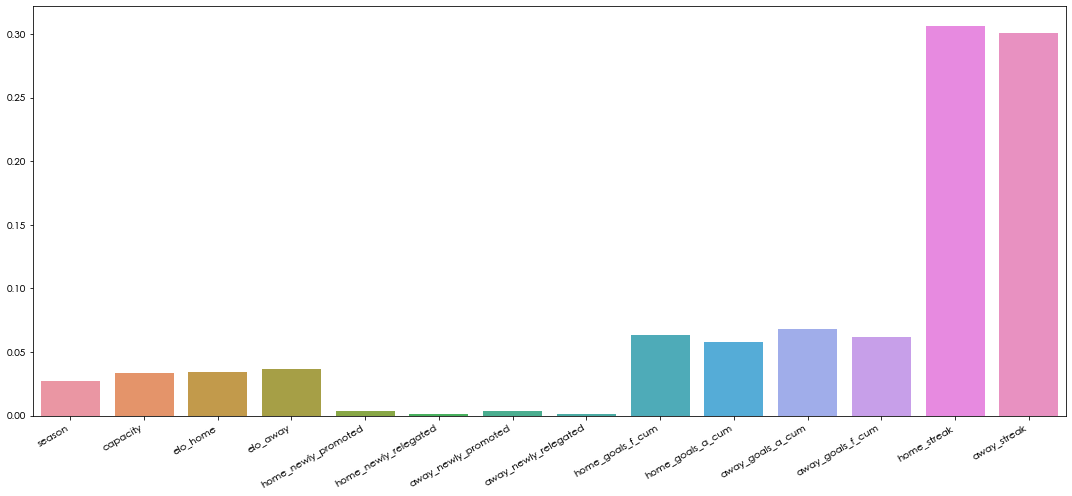

In [23]:
ax, fig = plt.subplots(figsize=[15,7])
sns.barplot(X.columns, rfcl.feature_importances_)
plt.xticks(rotation=30, horizontalalignment='right')
plt.tight_layout()

## Random Forest with just home/away streak, cumulative goals, and ELOs

In [24]:
X_streaks = X[['elo_home', 'elo_away', 
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 
       'home_streak', 'away_streak']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_streaks, y, test_size = 0.2, shuffle=True)
X_train.columns

Index(['elo_home', 'elo_away', 'home_goals_f_cum', 'home_goals_a_cum',
       'away_goals_a_cum', 'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [26]:
rfcl_streaks = RandomForestClassifier(max_depth=20).fit(X_train, y_train)
rfcl_streaks.score(X_test, y_test)

0.6971607291208523

In [27]:
# Brighton v Norwich 2/4/22
rfcl_streaks.predict([[1698.68762207, 1598.51208496, 26, 36, 18, 63, -6, -6]])

array([4])

# Lasso regression?

In [4]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

Lasso(alpha=0.1)

In [5]:
print(lasso.coef_)
print(lasso.intercept_)

[-0.00226391  0.          0.          0.0025078   0.         -0.
  0.         -0.         -0.00345     0.00940341 -0.00467218  0.01181737
 -0.0294981   0.04137891]
2.655572647560075


In [6]:
X.columns

Index(['season', 'capacity', 'elo_home', 'elo_away', 'home_newly_promoted',
       'home_newly_relegated', 'away_newly_promoted', 'away_newly_relegated',
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [ ]:
# suggests dropping the following features:
# capacity, elo_home, all newly promoted/relegated